### Data Analysis

1. Replaces google key json file

` client = bigquery.Client.from_service_account_json('stellar-verve-478012-n6-5c79fd657d1a.json') `

2. Replace Projec, Dataset and tables appropriately for all Queries.

    FROM `stellar-verve-478012-n6.olist_raw_analytics.fct_order_items` i
    JOIN `stellar-verve-478012-n6.olist_raw_analytics.fct_orders` o 


In [2]:
import pandas as pd
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt

# Setup the client
# Option A: If you have the GOOGLE_APPLICATION_CREDENTIALS env var set:
# client = bigquery.Client()

# Option B: Explicitly pointing to a JSON key file:
client = bigquery.Client.from_service_account_json('stellar-verve-478012-n6-5c79fd657d1a.json')

def query_bigquery(sql_query):
    """Runs a query and returns a Pandas DataFrame."""
    query_job = client.query(sql_query)
    return query_job.to_dataframe()

# Set a nice theme for your charts
sns.set_theme(style="whitegrid")

In [6]:
sql_trend = """
    SELECT 
        DATE_TRUNC(o.purchase_at, MONTH) as order_month,
        SUM(i.price) as total_sales
    FROM `stellar-verve-478012-n6.olist_raw_analytics.fct_order_items` i
    JOIN `stellar-verve-478012-n6.olist_raw_analytics.fct_orders` o 
        ON i.order_id = o.order_id
    WHERE o.order_status = 'delivered'
    GROUP BY 1
    ORDER BY 1
"""
df_trend = query_bigquery(sql_trend)

/Users/govindandhanasekaran/miniconda3/envs/prj/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


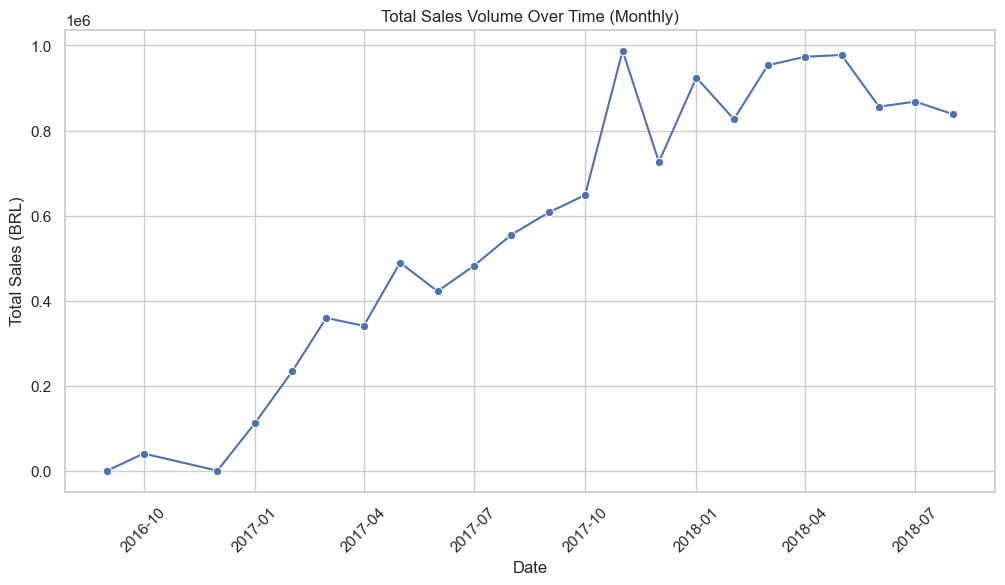

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_trend, x='order_month', y='total_sales', marker='o', color='b')
plt.title('Total Sales Volume Over Time (Monthly)')
plt.ylabel('Total Sales (BRL)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

In [8]:
sql_categories = """
    SELECT 
        p.category_name as category,
        COUNT(i.order_id) as total_orders,
        SUM(i.price) as total_revenue
    FROM `stellar-verve-478012-n6.olist_raw_analytics.fct_order_items` i
    JOIN `stellar-verve-478012-n6.olist_raw_analytics.dim_products` p 
        ON i.product_id = p.product_id
    GROUP BY 1
    ORDER BY total_revenue DESC
    LIMIT 10
"""
df_cat = query_bigquery(sql_categories)

/Users/govindandhanasekaran/miniconda3/envs/prj/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


/var/folders/93/j55r4pt15y77lgqnbbw8vgvm0000gn/T/ipykernel_21624/1452988165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cat, x='total_revenue', y='category', palette='viridis')


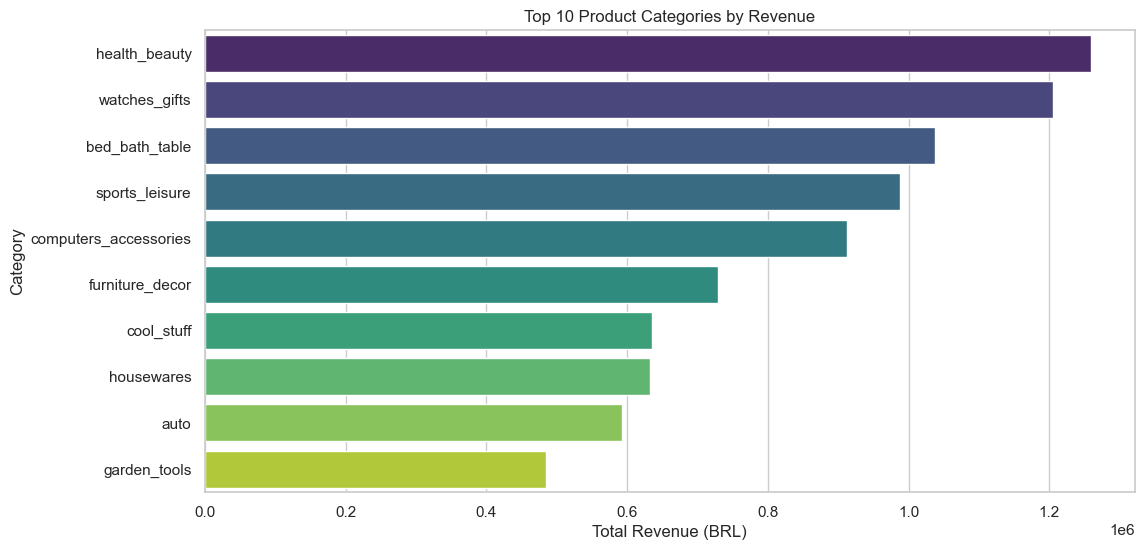

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_cat, x='total_revenue', y='category', palette='viridis')
plt.title('Top 10 Product Categories by Revenue')
plt.xlabel('Total Revenue (BRL)')
plt.ylabel('Category')
plt.show()